<a href="https://colab.research.google.com/github/Darthvaderzx/Midterm/blob/main/Midterms1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Midterm Exam

Samuel Hans - 2440008714


---


Note: I was unable to import data while using JupyterLite, thus I am using GoogleCollab for my answers

Collab link: https://colab.research.google.com/drive/1KuHyMRnSqfyLvHgjxPL4crfU1fyBCnpJ?usp=sharing 

Initilization cell, data reading:

In [108]:
# Initialization
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as linear
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import r2_score,mean_absolute_error
import numpy as np


url = 'https://raw.githubusercontent.com/Darthvaderzx/Midterm/main/BikeData.csv'
data = pd.read_csv(url)
print("NA values?")
print(data.isna().values.any()) # Checking for NA values, none found
print(data.head()) # example data



NA values?
False
             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  




---


#Question 1

> Alternative objective for this dataset?

I thnk predicting temperature is a good alternative objective based on this dataset.




a. Why is this a good objective for this data?

> The objective of predicting temperature can be achieved by using many of the features available in the dataset. For example, we know that season, humidity, and wind speed are all related to temperature. Thus it is plausible to predict temperature by using these variables in a machine learning algorithm.

b. Which method can be used to solve this objective?

>The linear regression model may work for some of the more straighforward features such as windspeed/humidity vs temperature. However, weighting variables and penalization can also be implemented to get better results and incorperate variables like season and weather. Therefore it is more optimal to use a more advanced linear regression model such as ridge regression or lasso regression.

c. Show the variables used in the task and explain!
> We know some of variables that definitely affect temperature such as: wind speed, humidity, season, and weather. wind speed and humidity are both continous variables, while season and weather are discrete variables. 


d. Find the expected value on one of the variables!

>Since the probability of getting one of any of the seasons is 0.25, the expected value is 0x0.25 + 1x0.25 + 2x0.25 + 3x0.25 = 1.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40021e1790>]],
      dtype=object)

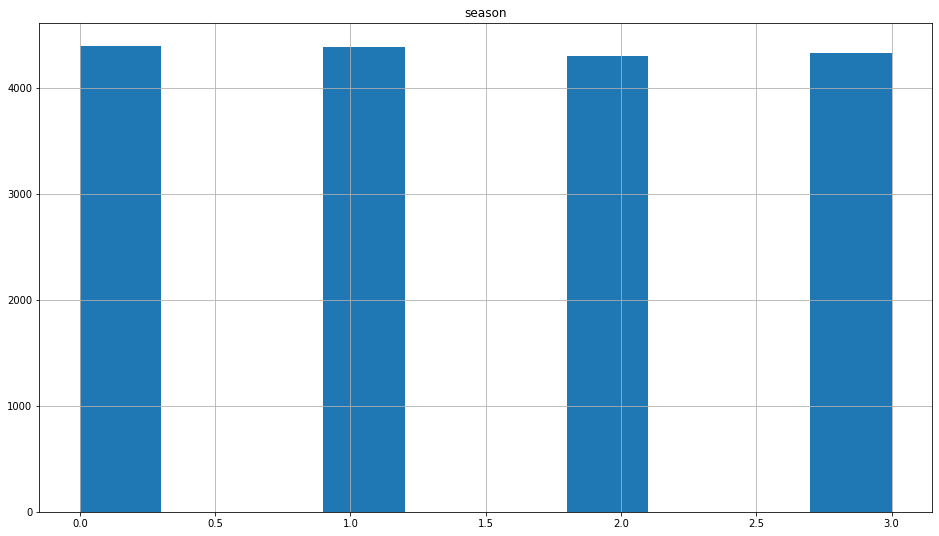

In [127]:
seasons = data[["season"]]

seasons.hist()





# Question 2

> Comparing data graphs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


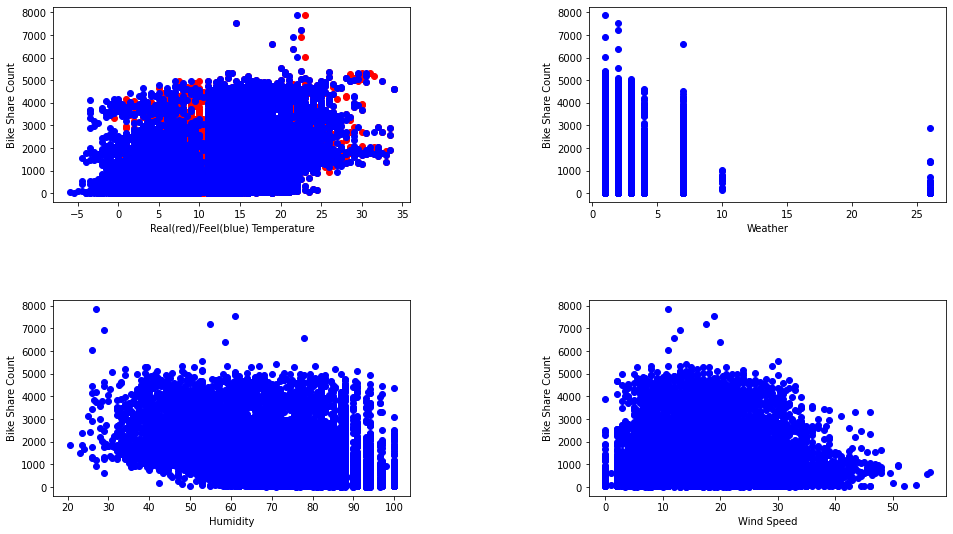

In [ ]:
plt.subplot(221)
plt.scatter(data["t1"], data["cnt"], color="red") # Real temperature
plt.ylabel("Bike Share Count")

plt.subplot(221)
plt.scatter(data["t2"], data["cnt"], color="blue")
plt.xlabel("Real(red)/Feel(blue) Temperature")
plt.ylabel("Bike Share Count")

plt.subplot(222)
plt.scatter(data["weather_code"], data["cnt"], color="blue")
plt.xlabel("Weather")
plt.ylabel("Bike Share Count")

plt.subplot(223)
plt.scatter(data["hum"], data["cnt"], color="blue")
plt.xlabel("Humidity")
plt.ylabel("Bike Share Count")

plt.subplot(224)
plt.scatter(data["wind_speed"], data["cnt"], color="blue")
plt.xlabel("Wind Speed")
plt.ylabel("Bike Share Count")



plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.show()

>Linear Regression

In [70]:
newData = data[["cnt", "t1", "t2", "hum", "wind_speed", "weather_code"]] #Datas for regression, avoids boolean values
print(newData.head())
# I chose mutlivariable regression because based on the graphs above, no one data value is good enough for our algorithm

testData, trainData = split(newData, test_size=0.3) # 30% of data allocated for testing
regression = linear.LinearRegression()
x = trainData[["t1", "hum", "wind_speed", "weather_code"]]
y = trainData["cnt"]
regression.fit(x, y)
print('Coefficients = ',  regression.coef_)


   cnt   t1   t2    hum  wind_speed  weather_code
0  182  3.0  2.0   93.0         6.0           3.0
1  138  3.0  2.5   93.0         5.0           1.0
2  134  2.5  2.5   96.5         0.0           1.0
3   72  2.0  2.0  100.0         0.0           1.0
4   47  2.0  0.0   93.0         6.5           1.0
Coefficients =  [ 45.90216891 -28.05966355  -3.10033797  -7.56035859]


In [71]:
testing = regression.predict(testData[["t1", "hum", "wind_speed", "weather_code"]])

print("MAE: ", mean_absolute_error(testData[["cnt"]], testing))
print("R2 : ", r2_score(testData[["cnt"]], testing))


MAE:  690.2006962933517
MSE:  869729.2381339775
R2 :  0.2528301283307365


Performance of the model is not the best, likely due to high variance in the original data. The use of unweighted data also contributes to the resulting performance

# Question 3


In [105]:
from sklearn.linear_model import Ridge
ridgeData = data[["cnt", "t1", "t2", "hum", "wind_speed", "weather_code", "is_holiday", "is_weekend", "season"]] 
print(ridgeData.head())

testData, trainData = split(ridgeData, test_size=0.3)
x = trainData[["t1", "hum", "wind_speed", "weather_code"]]
y = trainData["cnt"]
ridge = Ridge(alpha=20)
ridge.fit(x, y)
print('Coefficients = ',  ridge.coef_)

   cnt   t1   t2    hum  wind_speed  weather_code  is_holiday  is_weekend  \
0  182  3.0  2.0   93.0         6.0           3.0         0.0         1.0   
1  138  3.0  2.5   93.0         5.0           1.0         0.0         1.0   
2  134  2.5  2.5   96.5         0.0           1.0         0.0         1.0   
3   72  2.0  2.0  100.0         0.0           1.0         0.0         1.0   
4   47  2.0  0.0   93.0         6.5           1.0         0.0         1.0   

   season  
0     3.0  
1     3.0  
2     3.0  
3     3.0  
4     3.0  
Coefficients =  [ 44.09502919 -26.57987264  -2.68632898 -12.17783131]


In [106]:
ridgeTest = ridge.predict(testData[["t1", "hum", "wind_speed", "weather_code"]])

print("MAE: ", mean_absolute_error(testData[["cnt"]], ridgeTest))
print("R2 : ", r2_score(testData[["cnt"]], ridgeTest))

MAE:  693.7303055256373
R2 :  0.2598654961517536


#Question 4

The difference between Linear Regression and Ridge Regression is that linear regression is the simplest form of regression, where we use a simple formula with no weighted data values, no normalization, and no penalization.

Ridge regression on the other hand, affects the coefficients of a normal linear regression, to prevent multicollinearity. By penalizing the equation, we get better results through regularization.
